# Group Homework 4.2 - High Frequency Words

CUNY SPS - Data 620 - Web Analytics, Summer 2018

__Prof:__ Alain Ledon<br>
__Members:__ Andrew Carson, Nathaniel Cooper, Walt Wells<br>
__Presentation:__ https://raw.githubusercontent.com/wwells/CUNY_DATA_620_GROUP/master/4.2_Assignment/4.2_Presentation.m4v

### Data Set

"The Adventures of Huckleberry Finn" by Mark Twain

### Data Source

Project Gutenberg
https://www.gutenberg.org/ebooks/76


## Data Preparation

In [14]:
import urllib, re, nltk, string
import matplotlib.pyplot as plt
% matplotlib inline

url = "https://www.gutenberg.org/files/76/76-0.txt"
response = urllib.urlopen(url)
raw = response.read().decode('utf8')
raw = raw.encode('ascii','ignore')

In [15]:
print("Starting Point:", raw.rfind("*** START OF THIS PROJECT GUTENBERG EBOOK HUCKLEBERRY FINN ***"))
print("Stopping Point:", raw.rfind("End of the Project Gutenberg EBook of Adventures of Huckleberry Finn,"))

('Starting Point:', 583)
('Stopping Point:', 580556)


In [16]:
raw = raw[685:580544]

### Text Preparation

Includes make lower, a reckless punctuation strip that will disregard contractions, and lemmatization.

In [17]:
pattern = r'\w{3,}' #remove punct and words w/ letters < 2
tokens = nltk.regexp_tokenize(raw, pattern)
text = nltk.Text(tokens)
text[:10]

['ADVENTURES',
 'HUCKLEBERRY',
 'FINN',
 'Tom',
 'Sawyer',
 'Comrade',
 'Mark',
 'Twain',
 'Complete',
 'CONTENTS']

In [18]:
text = [word.lower() for word in text]
text[:10]

['adventures',
 'huckleberry',
 'finn',
 'tom',
 'sawyer',
 'comrade',
 'mark',
 'twain',
 'complete',
 'contents']

In [19]:
wnl = nltk.WordNetLemmatizer()
text = [wnl.lemmatize(t) for t in text]
text[:10]

[u'adventure',
 'huckleberry',
 'finn',
 'tom',
 'sawyer',
 'comrade',
 'mark',
 'twain',
 'complete',
 u'content']

## Objectives

### How many total unique words are in the corpus?  


In [20]:
uniqueWords = len(set(text))
print("UniqueWords: ", uniqueWords)

('UniqueWords: ', 5713)


### Taking the most common words, how many unique words represent half of the total words in the corpus? / Identify the 200 highest frequency words in this corpus.

In [21]:
allwords = float(len(text))
print("Lexical Diversity: ", len(set(text)) / allwords)
print("Number of Words in Corpus: ", allwords)

('Lexical Diversity: ', 0.0667585916776704)
('Number of Words in Corpus: ', 85577.0)


In [22]:
huckFreq = nltk.FreqDist(text)
top200 = huckFreq.most_common(200)

In [23]:
#generated roughly from p140, C4 4.3 of Natural Language Processing in Python
cumulative = 0.0
for rank, word in enumerate(top200):
    cumulative += word[1] * 100 / allwords
    print "%3d %6.2f%% %s" % (rank+1, cumulative, word[0])
    if cumulative > 50:
        break

  1   7.44% and
  2  13.17% the
  3  15.56% wa
  4  17.29% you
  5  18.71% that
  6  19.92% but
  7  20.92% for
  8  21.91% all
  9  22.88% out
 10  23.85% they
 11  24.82% say
 12  25.66% him
 13  26.41% there
 14  27.13% got
 15  27.82% then
 16  28.48% his
 17  29.12% she
 18  29.74% with
 19  30.35% them
 20  30.92% said
 21  31.49% down
 22  32.05% see
 23  32.60% what
 24  33.14% come
 25  33.67% had
 26  34.18% when
 27  34.67% about
 28  35.15% one
 29  35.63% well
 30  36.09% would
 31  36.54% jim
 32  36.98% time
 33  37.40% didn
 34  37.81% her
 35  38.21% get
 36  38.61% don
 37  38.97% way
 38  39.33% right
 39  39.69% ain
 40  40.04% could
 41  40.38% went
 42  40.72% warn
 43  41.06% good
 44  41.39% off
 45  41.73% over
 46  42.05% just
 47  42.37% like
 48  42.68% know
 49  42.99% old
 50  43.30% around
 51  43.61% thing
 52  43.90% now
 53  44.20% this
 54  44.48% tom
 55  44.75% along
 56  45.02% can
 57  45.28% back
 58  45.54% done
 59  45.80% because
 60  46.06% c

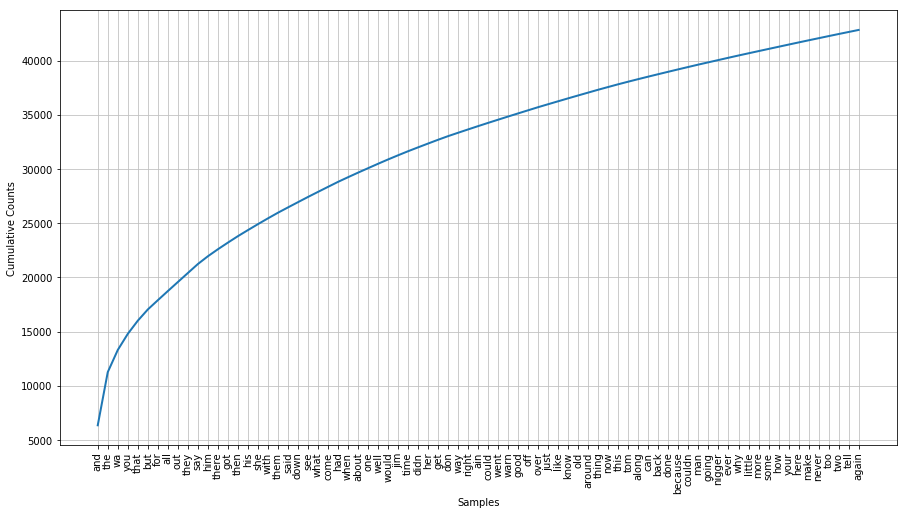

In [24]:
plt.figure(figsize=(15,8))
huckFreq.plot(77, cumulative=True)

### Create a graph that shows the relative frequency of these 200 words.

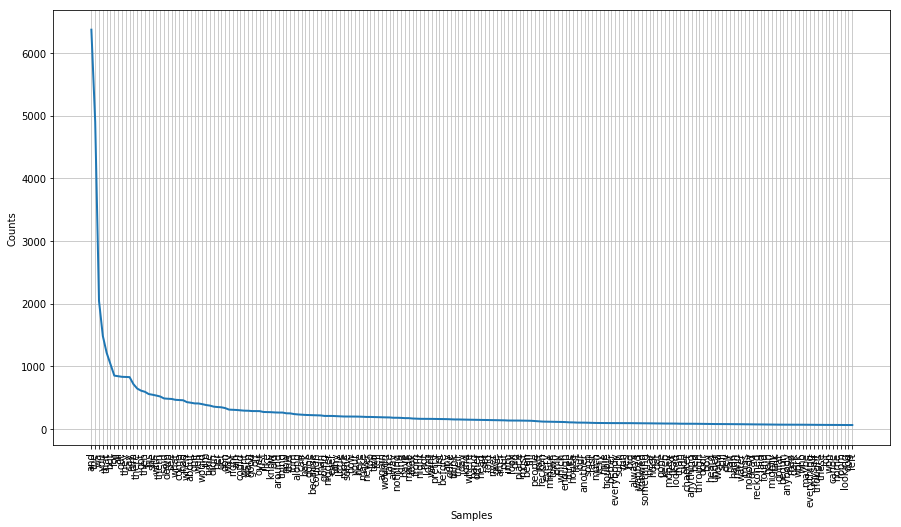

In [25]:
plt.figure(figsize=(15,8))
huckFreq.plot(200)

### Does the observed relative frequency of these words follow Zipf’s law?  Explain.

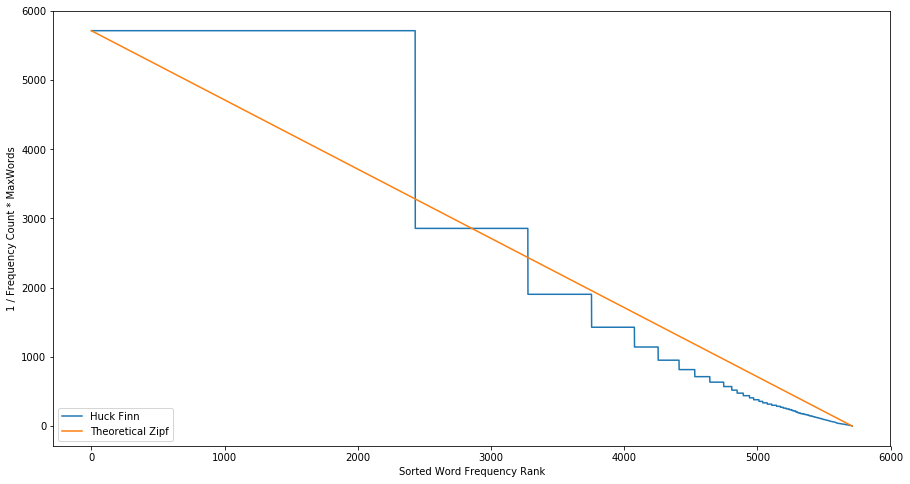

In [26]:
plt.figure(figsize=(15,8))

vals = sorted(huckFreq.values())
inv = [1/float(v) * uniqueWords for v in vals]

x = range(1, uniqueWords +1)
theory = list(x[::-1])

plt.plot(x, inv)
plt.plot(theory)
plt.xlabel("Sorted Word Frequency Rank")
plt.ylabel("1 / Frequency Count * MaxWords")
plt.legend(['Huck Finn', 'Theoretical Zipf'], loc='lower left')

### In what ways do you think the frequency of the words in this corpus differ from "all words in all corpora"?

Since we see our text generally conforms to the theoretical Zipf's law, it is likely that our corpora is a reasonable representation of the larger population of "all words in all corpora". 